Creat Enivorment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

import pickle

E:\2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


View Data

In [2]:
dataset=pd.read_csv('food_coded.csv')
dataset.head(n=5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

Preprocessing Data

In [4]:
dataset.drop(['comfort_food_reasons_coded','eating_changes_coded','father_education','diet_current_coded','father_profession','mother_education','mother_profession','on_off_campus','comfort_food','comfort_food_reasons','diet_current','eating_changes','fav_cuisine','food_childhood','type_sports','ideal_diet','healthy_meal',
        'GPA', 'calories_scone', 'cook', 'cuisine', 'drink','fav_cuisine_coded',
       'employment', 'exercise', 'fav_food', 'income', 'life_rewarding',
       'marital_status', 'meals_dinner_friend', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'tortilla_calories',
       'weight'],axis='columns',inplace=True)
dataset.head(n=4)

,Gender,breakfast,calories_chicken,calories_day,coffee,comfort_food_reasons_coded.1,eating_changes_coded1,eating_out,ethnic_food,fries,...,indian_food,italian_food,nutritional_check,parents_cook,pay_meal_out,thai_food,turkey_calories,veggies_day,vitamins,waffle_calories
0,2,1,430,NaN,1,9,1,3,1,2,...,5,5,5,1,2,1,345,5,1,1315
1,1,1,610,3.0,2,1,2,2,4,1,...,4,4,4,1,4,2,690,4,2,900
2,1,1,720,4.0,2,1,3,2,5,1,...,5,5,4,1,3,5,500,5,1,900
3,1,1,430,3.0,2,2,3,2,5,2,...,5,5,2,1,2,5,690,3,1,1315


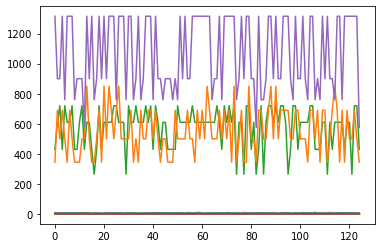

In [5]:
plt.plot(dataset)
plt.show()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        125 non-null    int64  
 1   breakfast                     125 non-null    int64  
 2   calories_chicken              125 non-null    int64  
 3   calories_day                  106 non-null    float64
 4   coffee                        125 non-null    int64  
 5   comfort_food_reasons_coded.1  125 non-null    int64  
 6   eating_changes_coded1         125 non-null    int64  
 7   eating_out                    125 non-null    int64  
 8   ethnic_food                   125 non-null    int64  
 9   fries                         125 non-null    int64  
 10  fruit_day                     125 non-null    int64  
 11  grade_level                   125 non-null    int64  
 12  greek_food                    125 non-null    int64  
 13  healt

In [7]:
dataset.columns[dataset.isna().any()]

Index(['calories_day'], dtype='object')

In [8]:
#sns.pairplot(dataset)

In [9]:
dataset.describe()

,Gender,breakfast,calories_chicken,calories_day,coffee,comfort_food_reasons_coded.1,eating_changes_coded1,eating_out,ethnic_food,fries,...,indian_food,italian_food,nutritional_check,parents_cook,pay_meal_out,thai_food,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,125.00000,125.000000,125.000000,125.00000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,1.75200,2.688000,4.552000,2.56000,3.744000,1.088000,...,3.152000,4.728000,3.152000,1.528000,3.408000,3.336000,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,0.43359,1.910987,2.547788,1.13876,1.177093,0.284435,...,1.486802,0.587175,1.205204,0.746778,1.040285,1.436528,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,2.00000,2.000000,3.000000,2.00000,3.000000,1.000000,...,2.000000,5.000000,2.000000,1.000000,3.000000,2.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,2.00000,2.000000,4.000000,2.00000,4.000000,1.000000,...,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,2.00000,3.000000,5.000000,3.00000,5.000000,1.000000,...,5.000000,5.000000,4.000000,2.000000,4.000000,5.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,2.00000,9.000000,13.000000,5.00000,5.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,850.000000,5.000000,2.000000,1315.000000


Visualization Data

In [10]:
dataset['calories_day'].unique()

array([nan,  3.,  4.,  2.])

In [11]:
dataset['veggies_day'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [12]:
dataset['fruit_day'].unique()

array([5, 4, 2, 3, 1], dtype=int64)

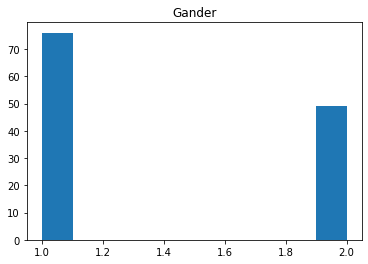

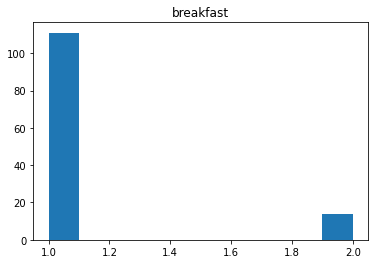

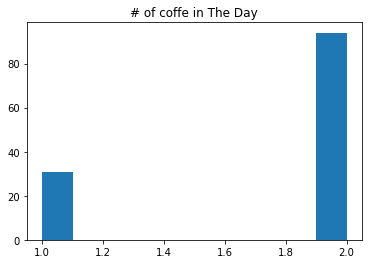

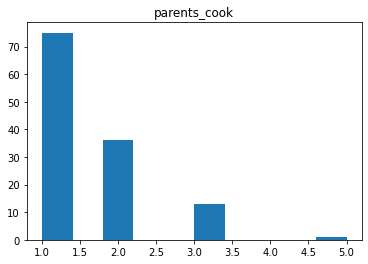

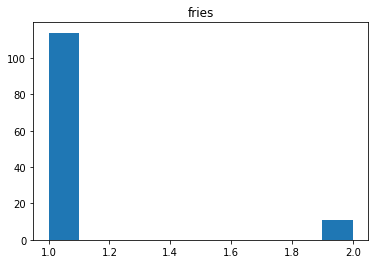

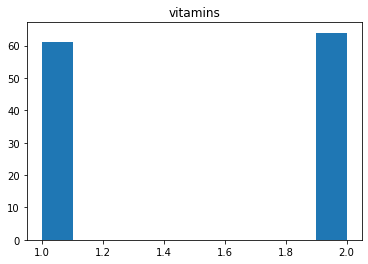

In [13]:
plt.hist(dataset['Gender'])
plt.title('Gander')
plt.show()

plt.hist(dataset['breakfast'])
plt.title('breakfast')
plt.show()

plt.hist(dataset['coffee'])
plt.title('# of coffe in The Day')
plt.show()


plt.hist(dataset['parents_cook'])
plt.title('parents_cook')
plt.show()


plt.hist(dataset['fries'])
plt.title('fries')
plt.show()

plt.hist(dataset['vitamins'])
plt.title('vitamins')
plt.show()

In [14]:
from sklearn.impute import SimpleImputer
sm=SimpleImputer(missing_values=np.nan,strategy='mean')
sm.fit(dataset)


SimpleImputer()

Model for predict calories_day

In [15]:
x=dataset.drop(['calories_day'],axis='columns')

y=dataset.calories_day

y=y.fillna(y.mean())

In [16]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

print(len(x_train))
print(len(y_train))

100
100


In [17]:
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
model_6=LinearRegression()
model_6.fit(x_train,y_train)


LinearRegression()

In [19]:
y_hat=model_6.predict(x_test)
mse=mean_squared_error(y_test,y_hat)*100
mse

45.11923751715229

In [20]:
pickle.dump(model_6,open('IEEE.pkl','wb'))

model=pickle.load(open('IEEE.pkl','rb'))


In [21]:
import numpy as np
from flask import Flask,request,jsonify,render_template
import pickle

In [22]:
app=Flask(__name__)
model=pickle.load(open("IEEE.pkl","rb"))

@app.route("/")
def Home():
    return render_template("index.html")

@app.route('/api',methods=['POST'])
def predicit():
    data=request.get_json(force=True)
    predicition=model.predicit([[np.array(data['exp'])]])
    output=predicition[0]

    return jsonify(output)
if __name__=="main":
    app.run(port=5000,debug=True)